In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.linalg import inv,pinvh,eig,eigh
from scipy.stats import linregress
%matplotlib inline

In [2]:
def Slope(a=1,p=1,nx=100,npt=15):
    # power subdunction
    def power(M,r) :
        D,P = eigh(M)
        D   = np.diag(D**r)
        return P.dot(D).dot(np.transpose(P))
    # initialisation
    dx   = 1/nx
    # Matrice opérateur
    T1   = dx*np.tri(nx)
    tTT1 = np.transpose(T1).dot(T1)
    T    = power(tTT1,a/2)
    tTT  = np.transpose(T).dot(T)
    # Matrice regularisation
    B   = 2*nx**2*np.diag(np.ones(nx)) \
          - nx**2*np.diag(np.ones(nx-1),1)\
          - nx**2*np.diag(np.ones(nx-1),-1)
    B[0,0]= nx**2
    D   = power(power(B,a),p/(2*a))
    tDD = np.transpose(D).dot(D)
    # Synthetic Data
    t  = np.linspace(0,1,nx)
    x  = np.exp(-(t-0.5)**2/0.1**2)
    x  = x/np.linalg.norm(x)
    rho= np.linalg.norm(D.dot(x))
    y  = T.dot(x)
    # eps
    eps = np.logspace(-6,0,npt)
    err = np.zeros(npt)
    for i,l in enumerate(eps):
        # step0 : initialisation
        error_compare = 1000
        # step1 : noisy data
        no = np.random.randn(nx)
        no = l*no*np.linalg.norm(y)/np.linalg.norm(no)
        yd = y + no
        # step 2 : optimal alpha
        for alpha in np.logspace(-12,3,10*npt):
            # step 3 : inversion
            xd    = np.linalg.inv(tTT + alpha*tDD).dot(np.transpose(T).dot(yd))
            xd[xd<0] = 0
            # step 4 : error
            error = np.linalg.norm(xd-x)
            if error < error_compare:
                error_compare = error
                err[i]        = error
    # plot
    s,r,_,_,_ = linregress(np.log(eps), np.log(err))
    plt.loglog(eps,err,'r+',label='error')
    plt.loglog(eps,np.exp(r)*eps**s,label="%.3f"%s)
    plt.legend()

# a=1

th. s = 0.8
th. qmax =  4 , q = 2.08


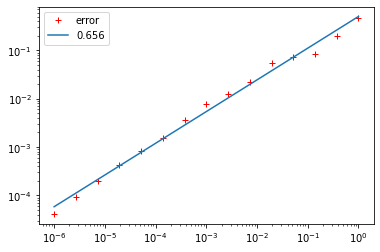

In [3]:
a = 1
p = 1
q = 2*(p+a)
print("th. s =", q/(a+q))
print("th. qmax = ",2*(p+a) ,", q = %.2f"%(0.675*a/(1-0.675)))
Slope(a,p)

th. s = 0.8571428571428571
th. qmax =  6 , q = 3.00


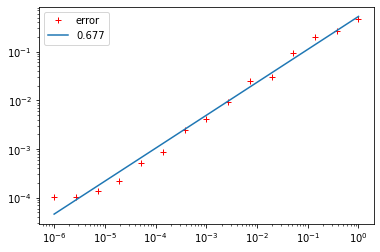

In [4]:
a = 1
p = 2
q = 2*(p+a)
print("th. s =", q/(a+q))
print("th. qmax = ",2*(p+a) ,", q = %.2f"%(0.75*a/(1-0.75)))
Slope(a,p)

# a = 1/2

th. s =  0.8571428571428571
th. qmax =  3.0 , q = 1.17


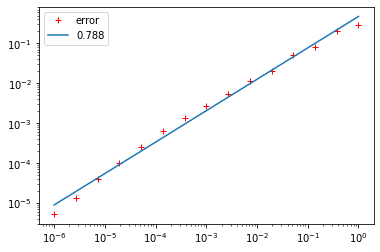

In [5]:
a = 1/2
p = 1
q = 2*(p+a)
print("th. s = ", q/(a+q))
print("th. qmax = ",2*(p+a) ,", q = %.2f"%(0.7*a/(1-0.7)))
Slope(1/2,1)

th. s =  0.8
th. qmax =  2.0 , q = 2.00


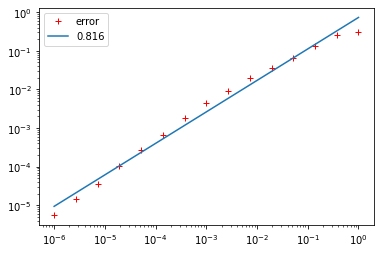

In [6]:
a = 1/2
p = 1/2
q = 2*(p+a)
print("th. s = ", q/(a+q))
print("th. qmax = ",2*(p+a) ,", q = %.2f"%(0.8*a/(1-0.8)))
Slope(1/2,1/2)